In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, set_link_color_palette
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture as GM
import dc_stat_think as dcst
import dabest
sep = '/'
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='#f2efef'

In [2]:
font = {'fontname':'Calibri'}

### Load data 

In [3]:
recording = r'E:\CIT_WAY\dat_files\cat\csvs'
filename ='neuron_stats.csv'

In [4]:
df = pd.read_csv(os.sep.join([recording, filename]))
df.index.name = 'Cluster_ID'
df = df[pd.notnull(df['SW_troff'])]

In [5]:
df_cit = df[(df['recording']=='Chronic_04_2018-08-05')|(df['recording']=='Chronic_30_2018-07-28')|(df['recording']=='Chronic_40_2018-08-13')|(df['recording']=='Chronic_41_2018-08-09')]
df_cit = df_cit[(df_cit['CV ISI'] != 0)&(df_cit['Firing Rate'] != 0)]

### Scale the data

In [6]:
scale =RobustScaler()
scaled_data = scale.fit_transform(df_cit[['CV ISI', 'Firing Rate']])

### Create the silhouette plots

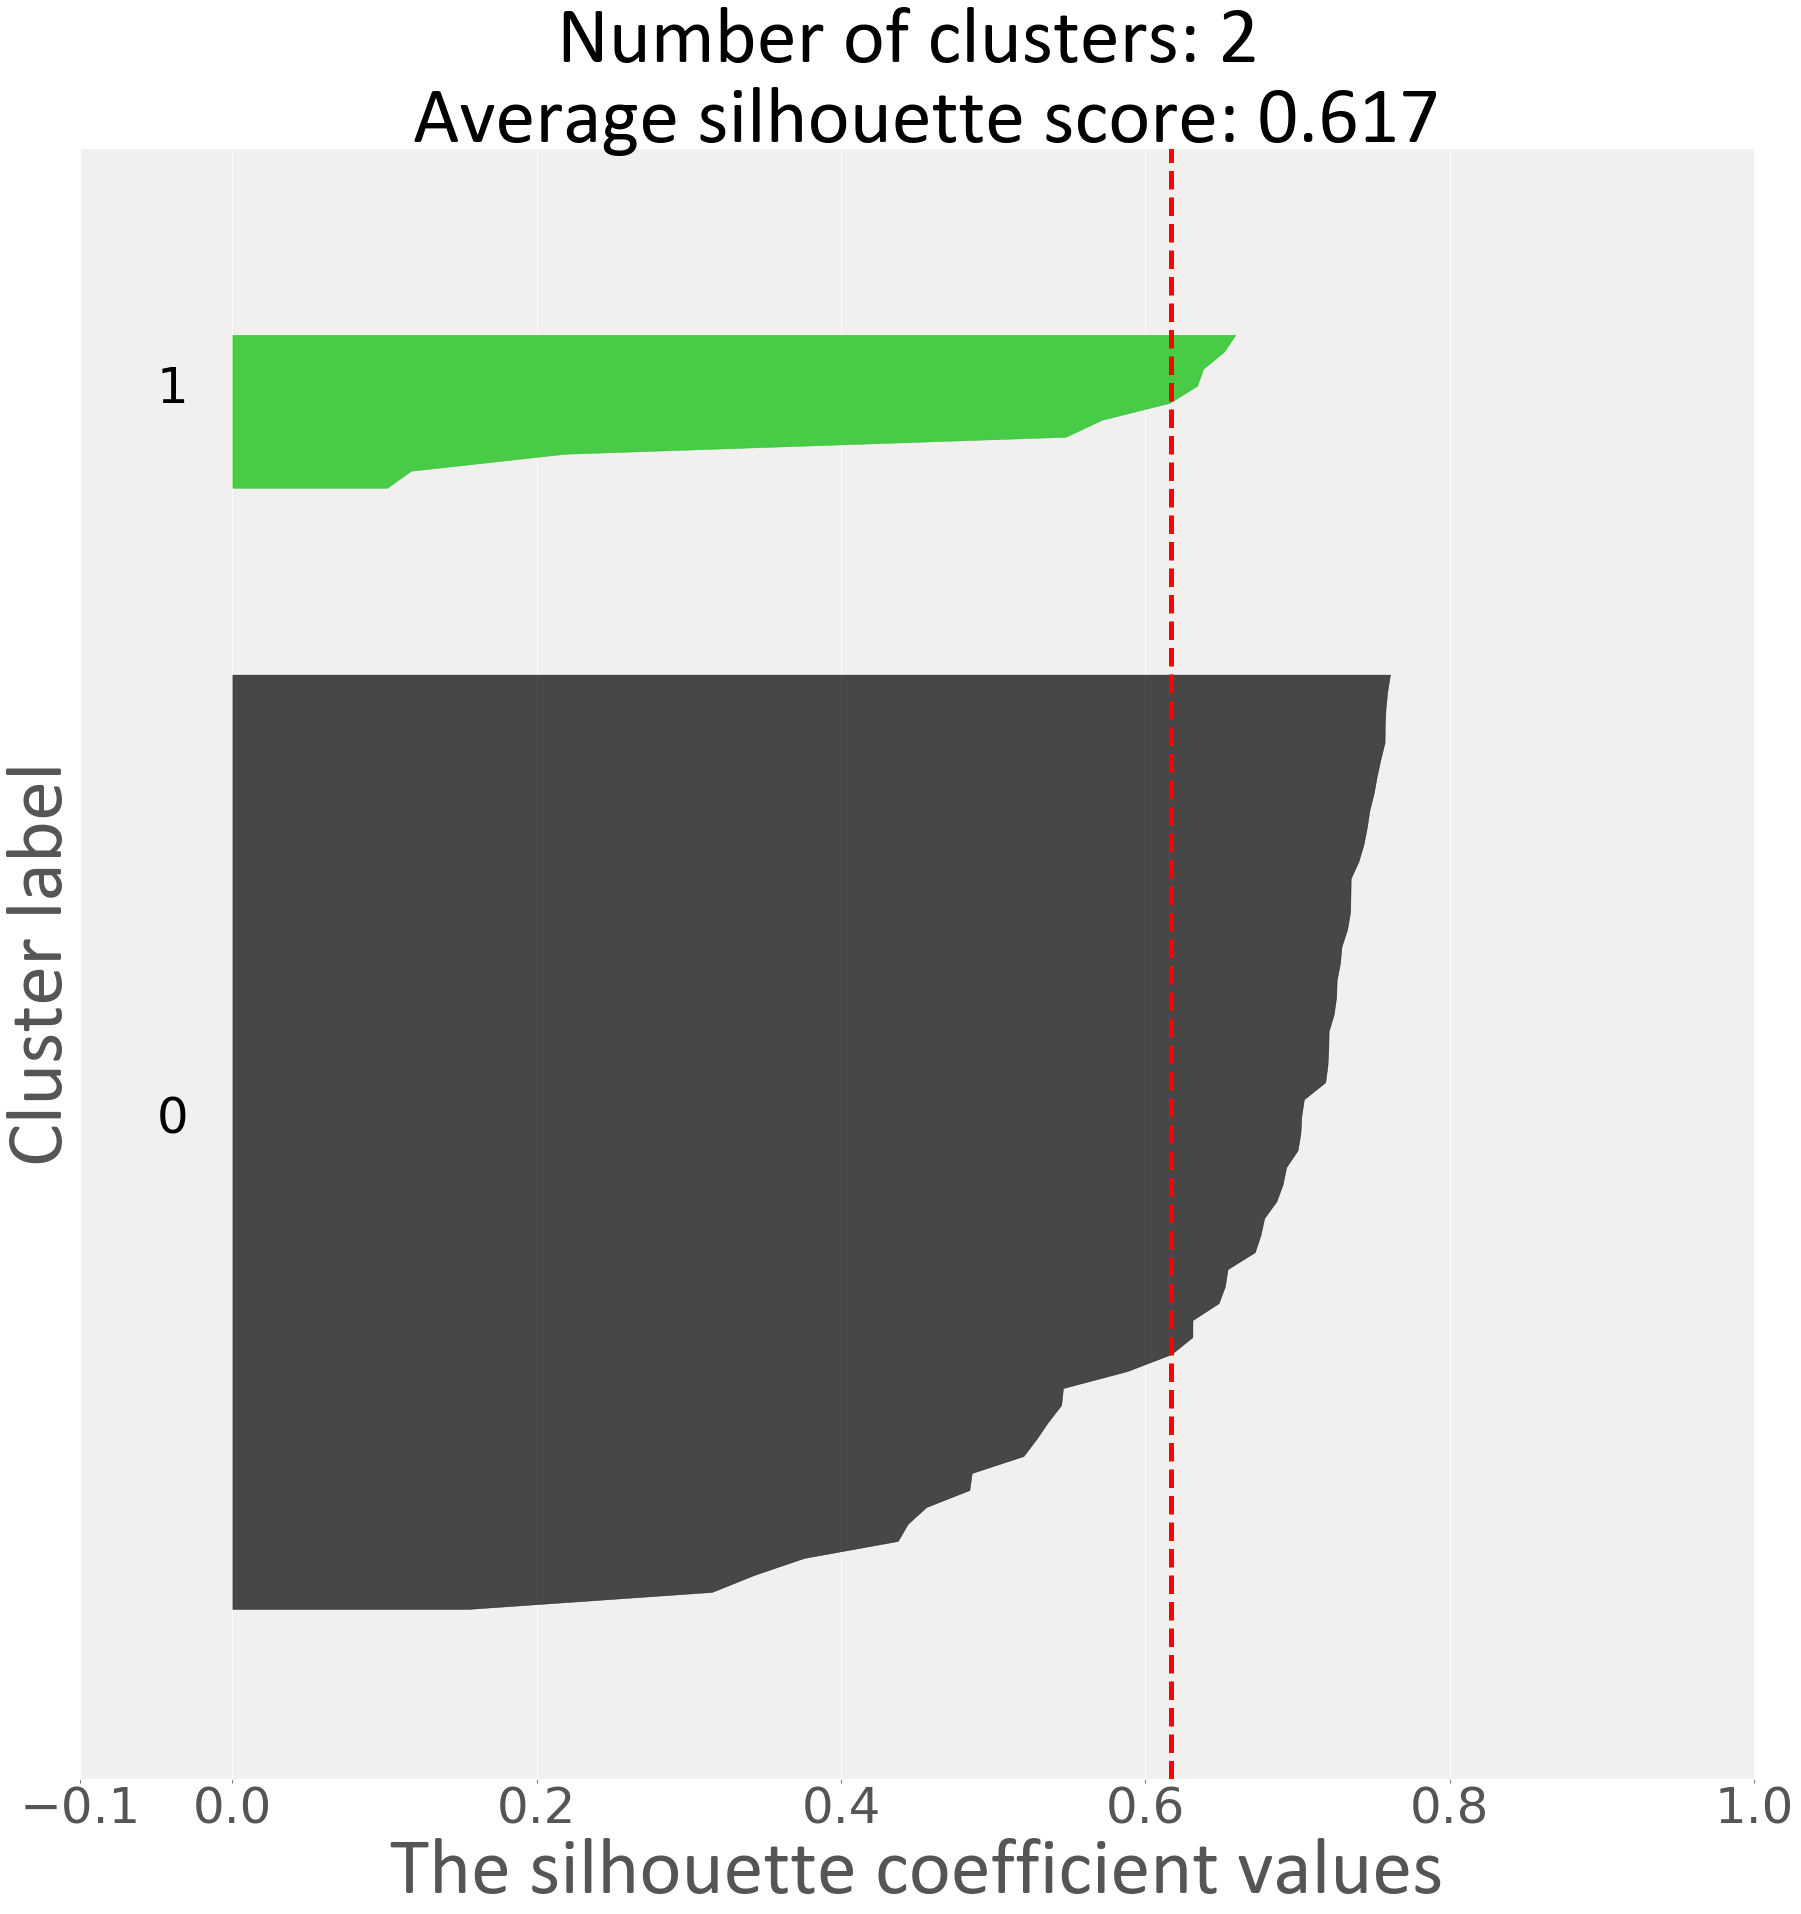

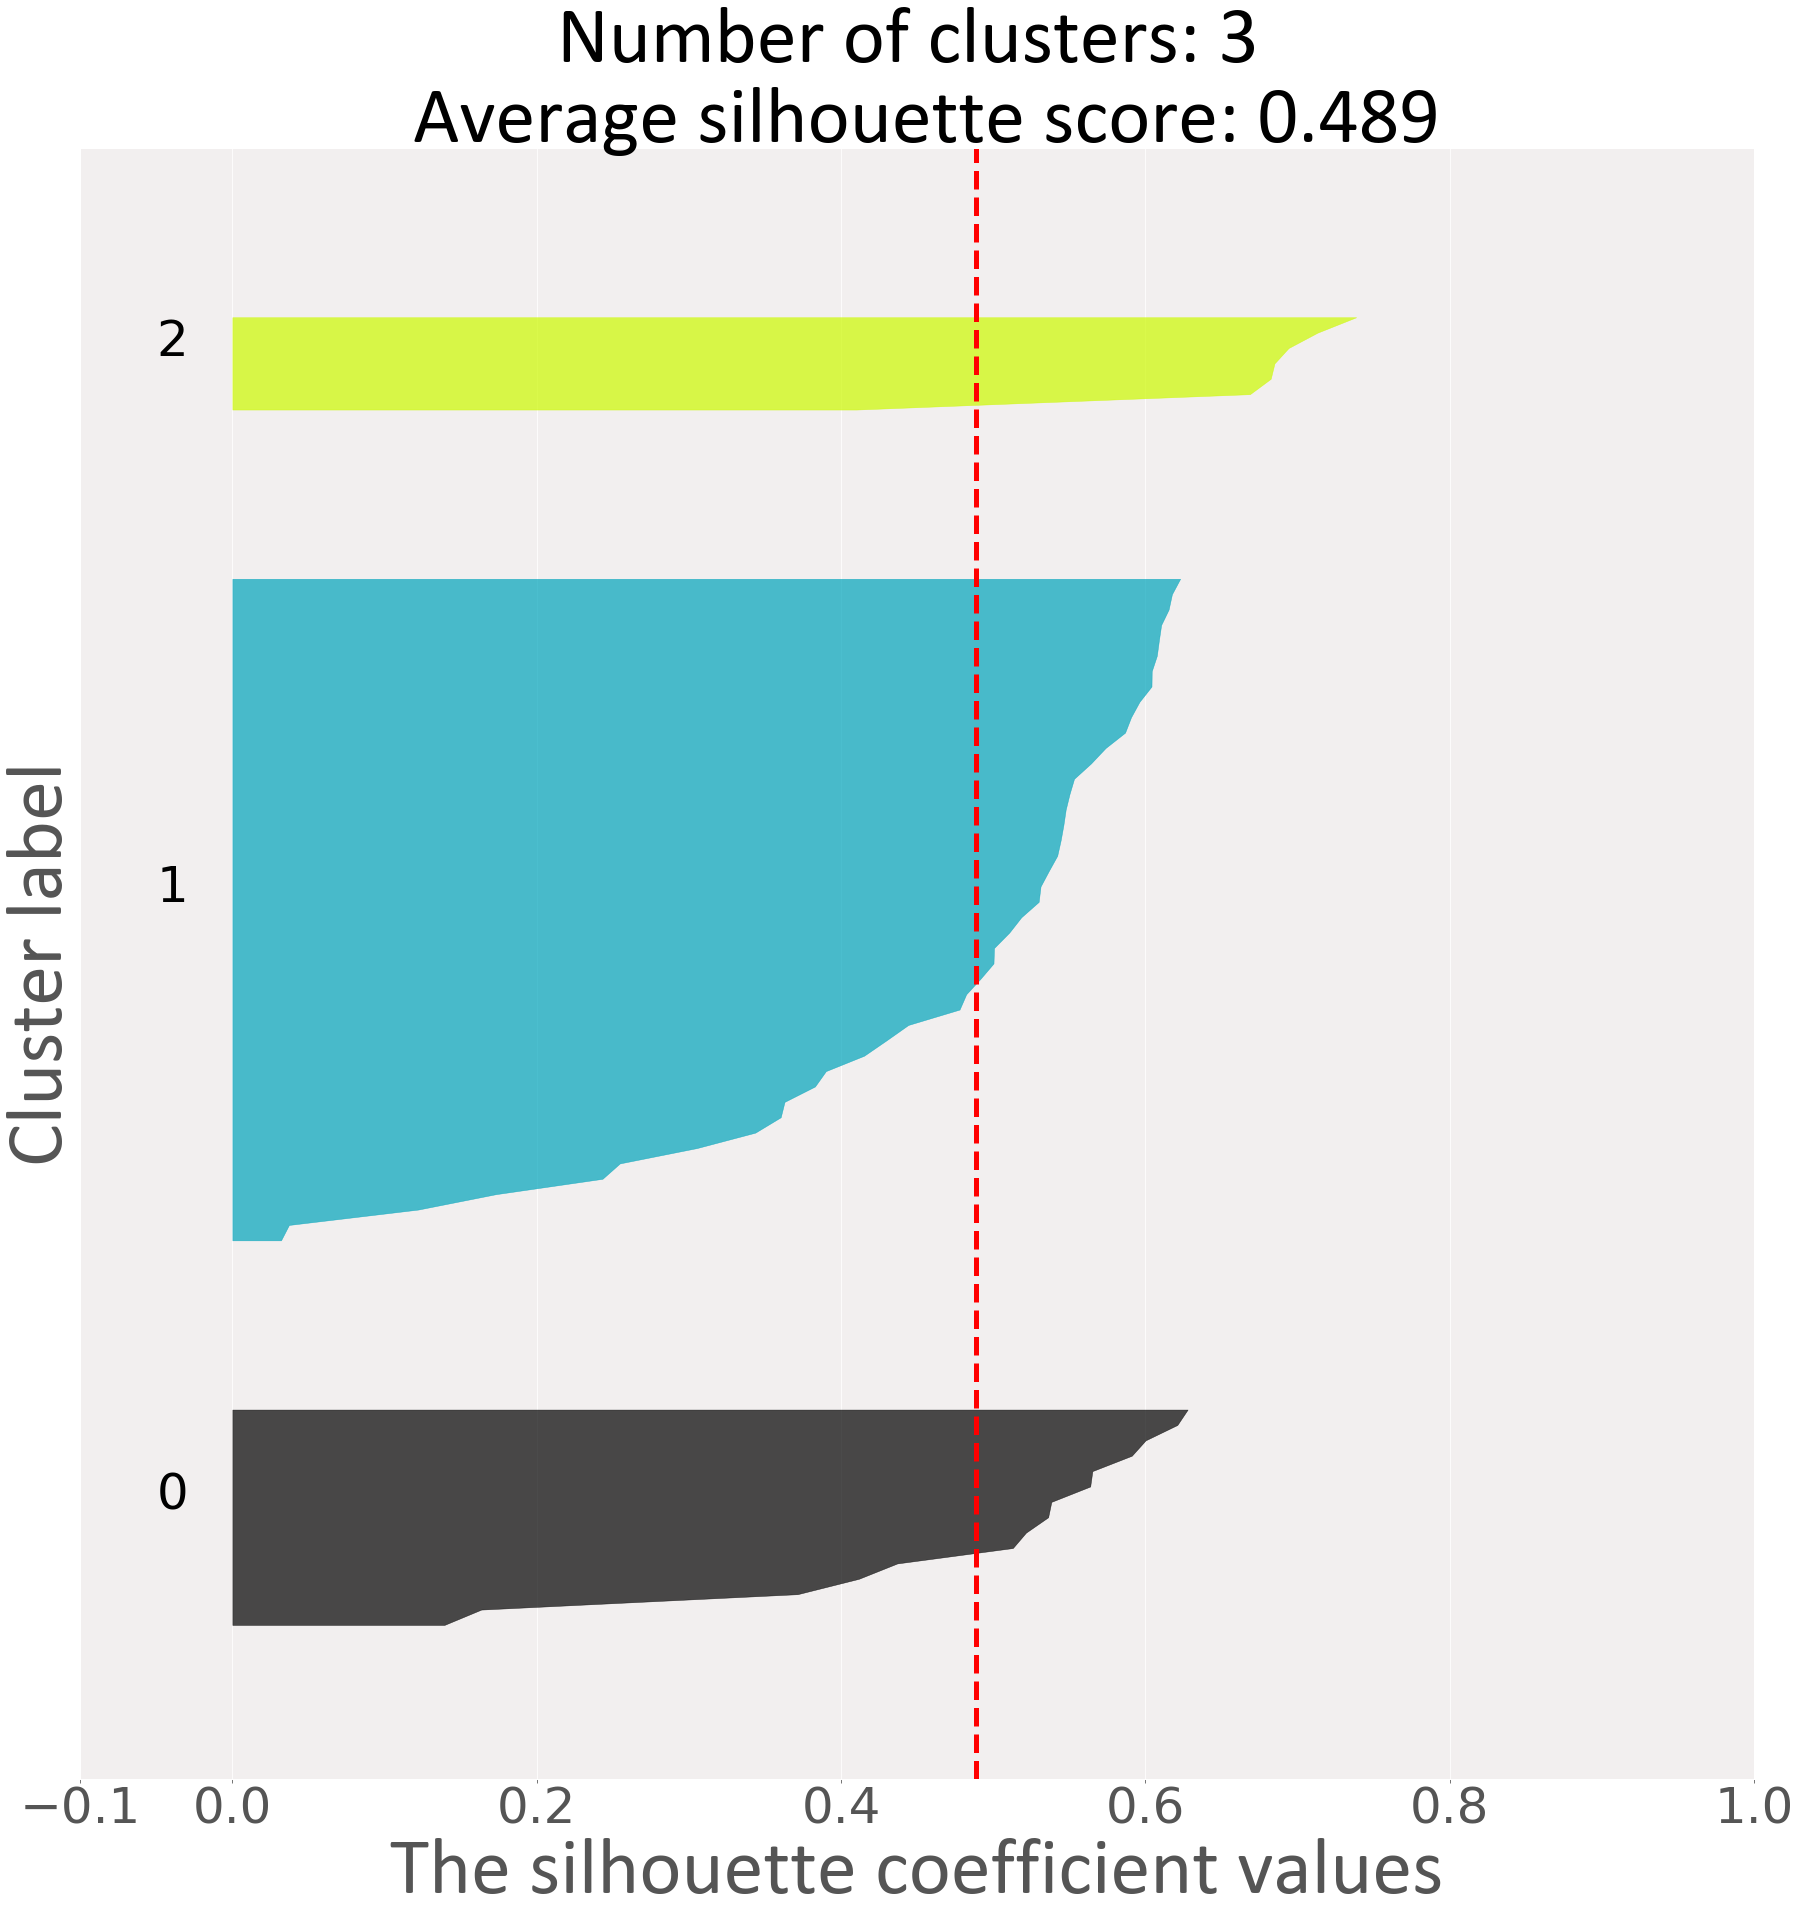

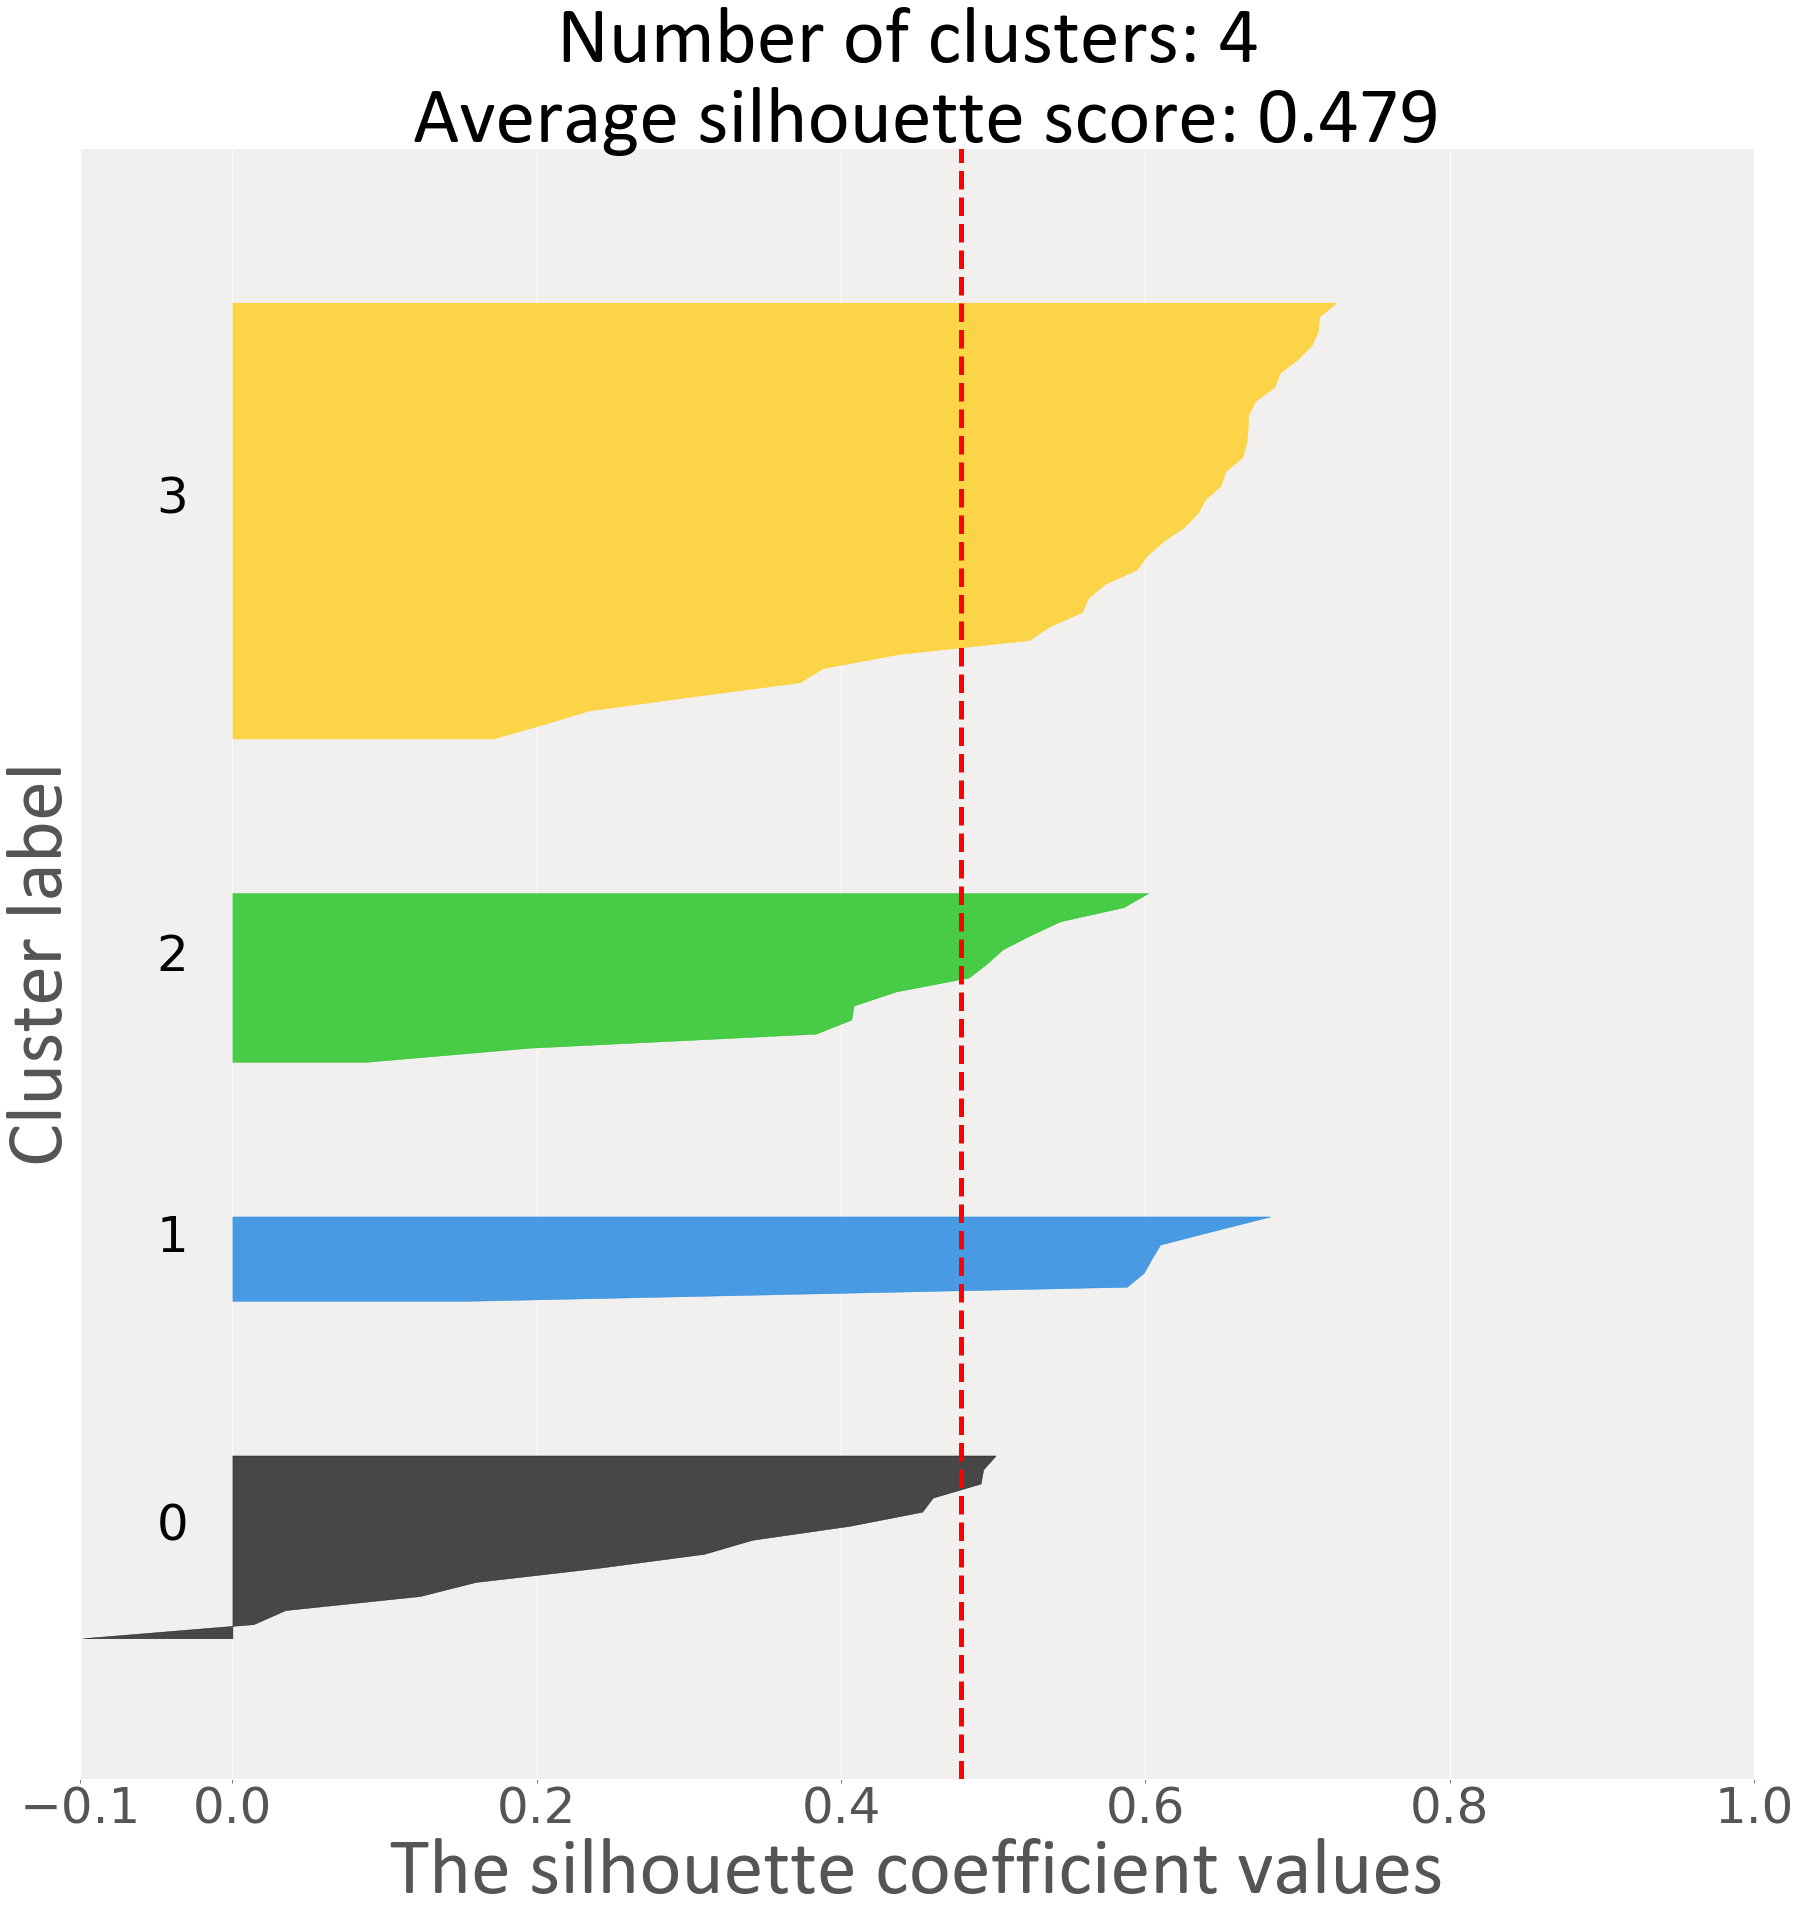

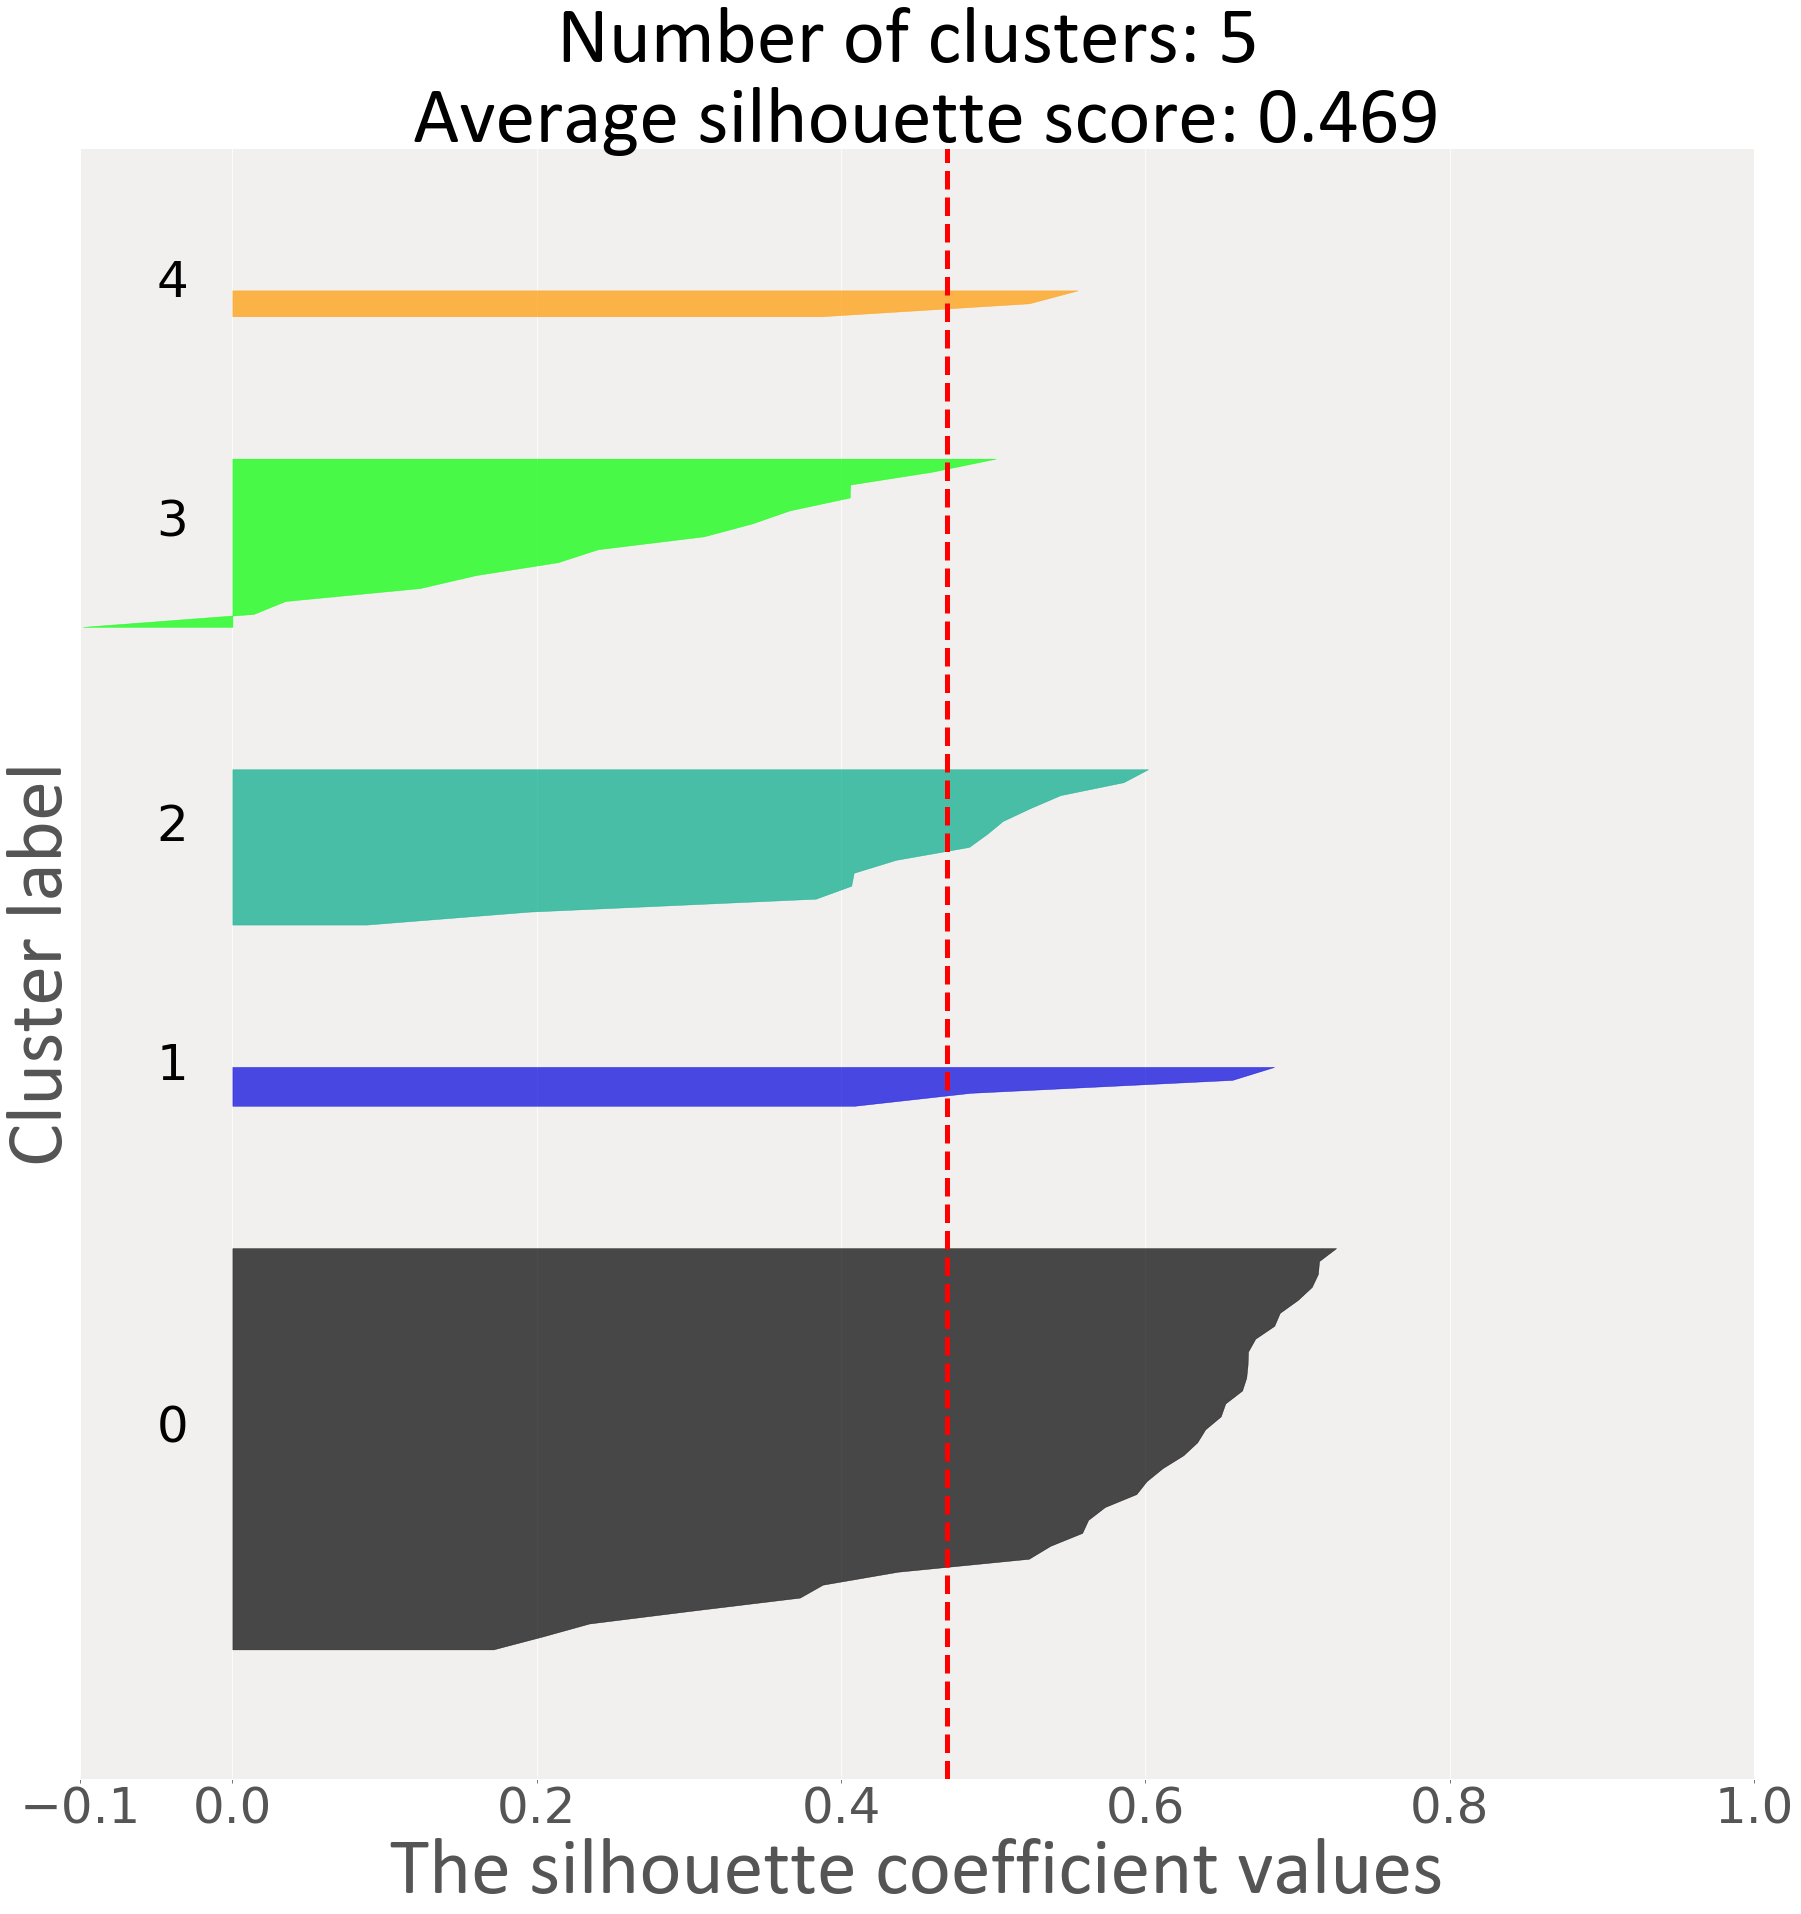

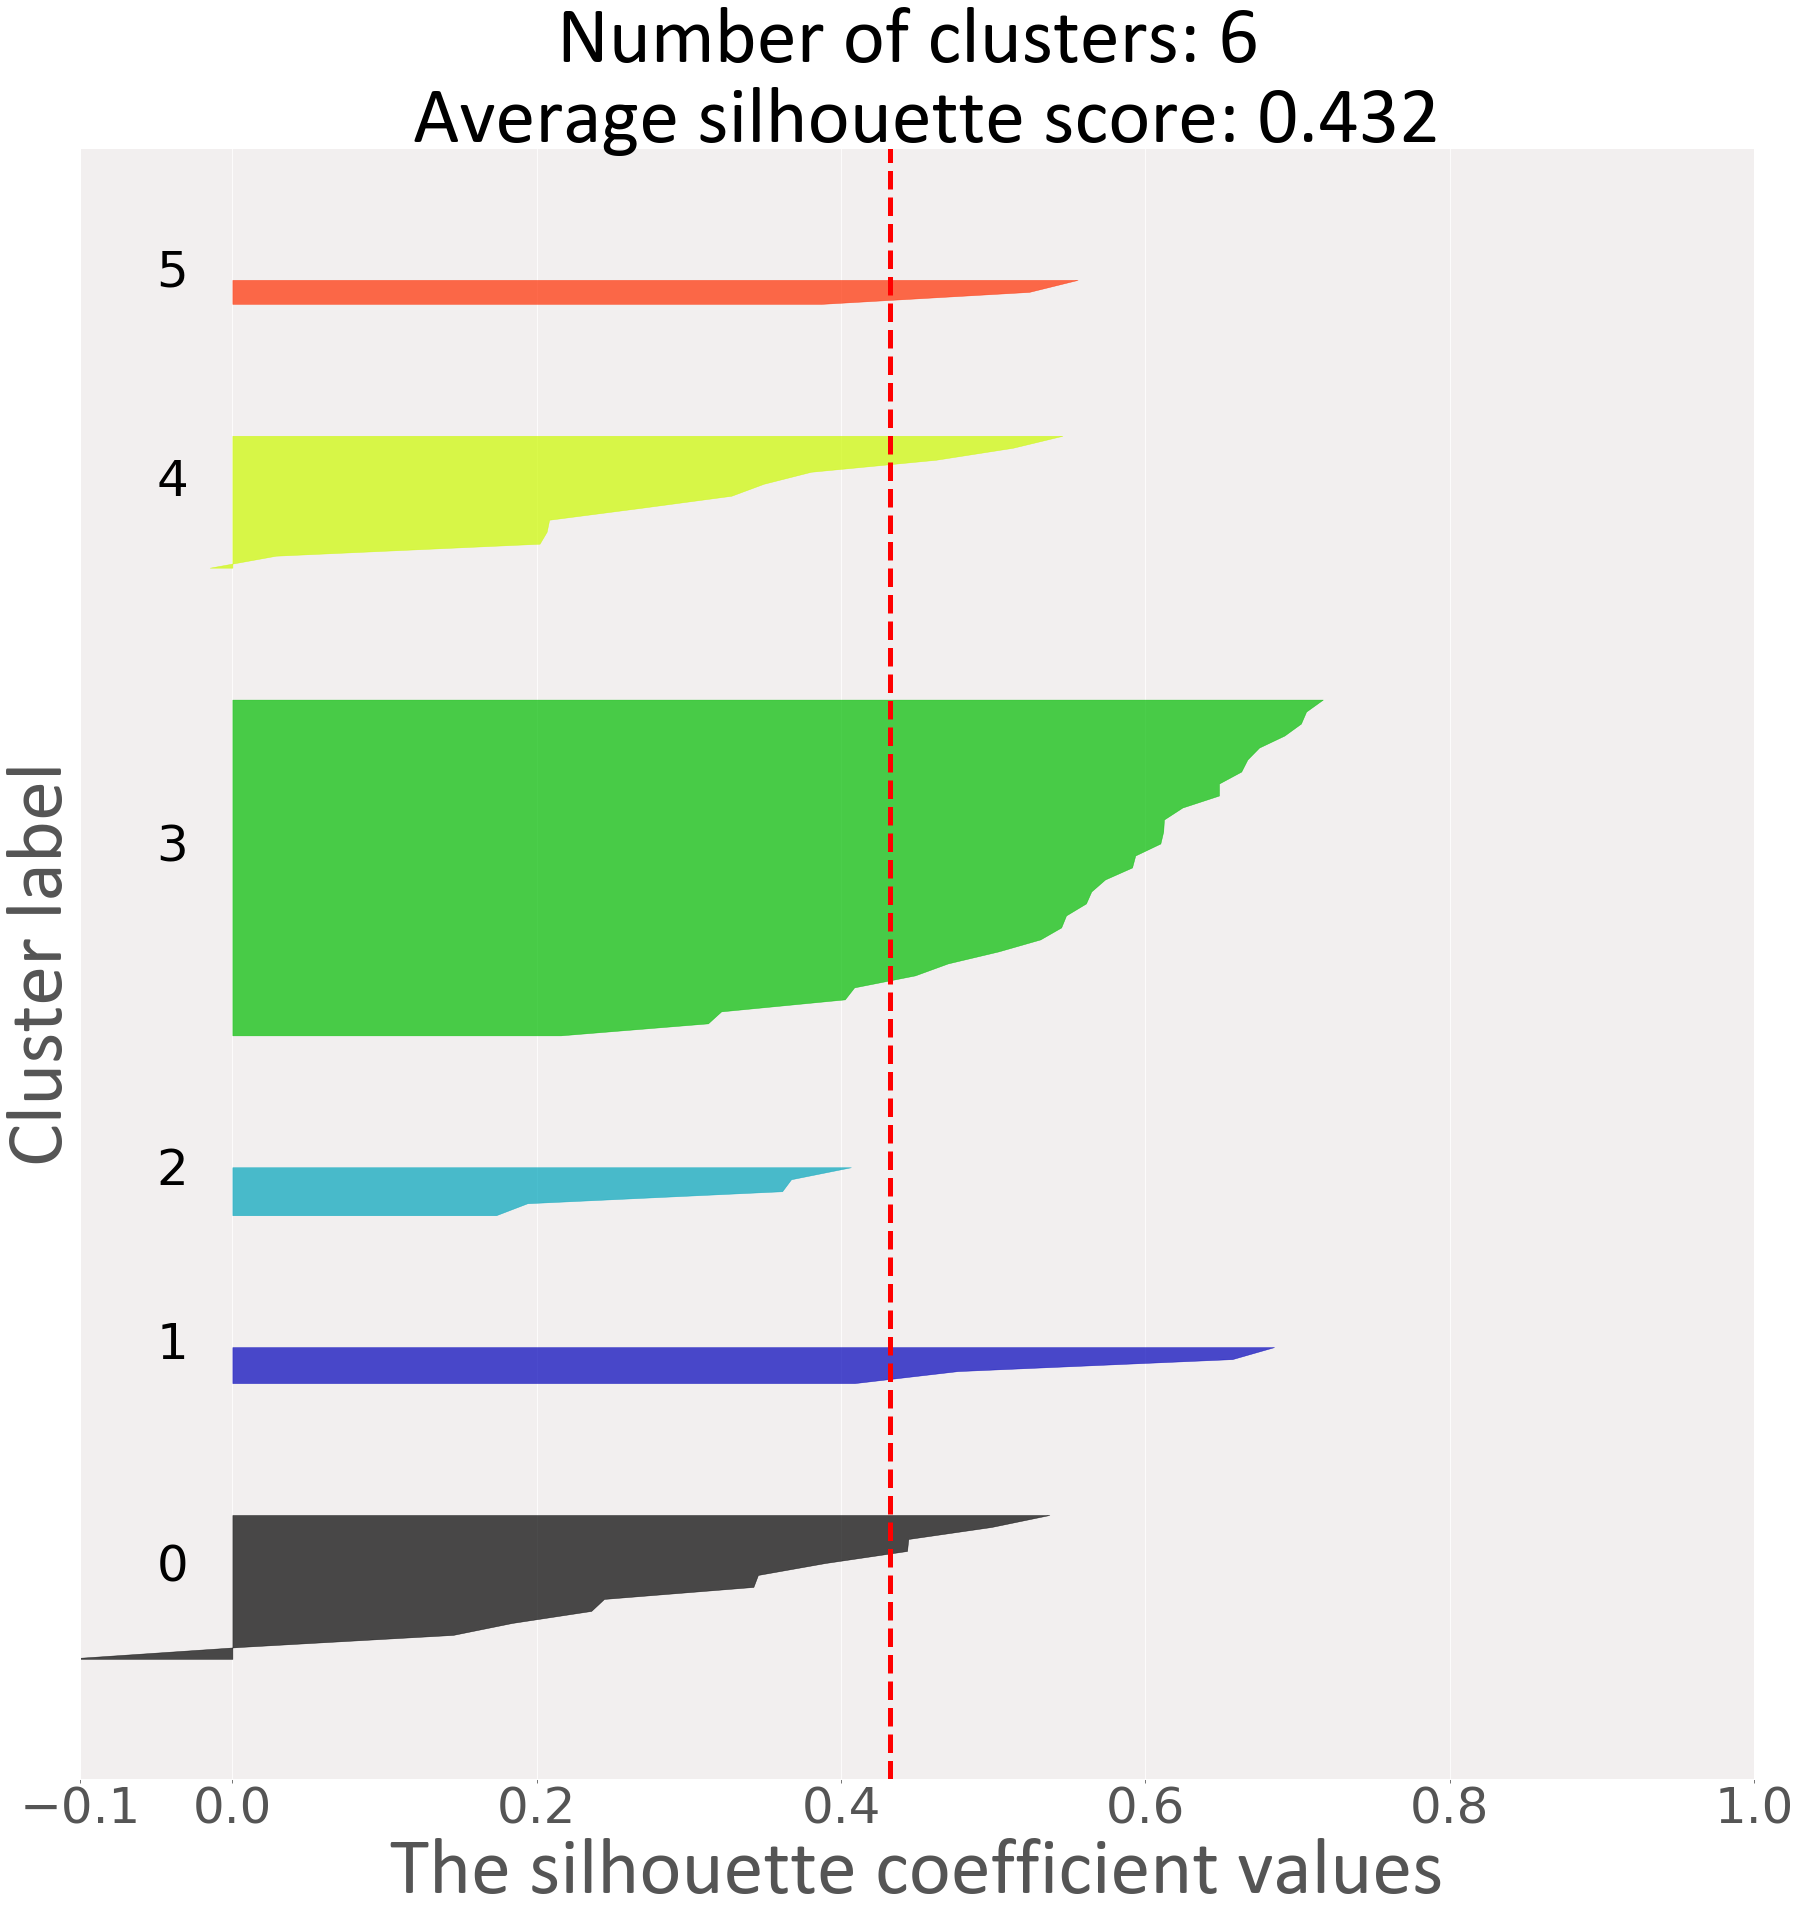

In [7]:
X =scaled_data

range_n_clusters = [2, 3, 4, 5, 6]
silo_aves = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(30, 30)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silo_aves.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=50)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Number of clusters: {} \n Average silhouette score: {}".format(n_clusters,'%.3f'%silhouette_avg), **font, fontsize=80)
    ax1.set_xlabel("The silhouette coefficient values", **font, fontsize=80)
    ax1.set_ylabel("Cluster label", **font, fontsize=80)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=5)
    ax1.tick_params(labelsize=50)
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()